In [1]:
# !pip install keras
# !pip install --upgrade pip

You are using pip version 10.0.1, however version 20.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
    100% |████████████████████████████████| 1.5MB 23.8MB/s eta 0:00:01
  Found existing installation: pip 10.0.1
    Uninstalling pip-10.0.1:
      Successfully uninstalled pip-10.0.1


In [1]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import numpy as np
import os

Using TensorFlow backend.


In [3]:
# Directory path
train_data_dir = '../data/bwcracks/train'
test_data_dir = '../data/bwcracks/test'

# Get all the data in the directory data/validation, and reshape them
test_generator = ImageDataGenerator().flow_from_directory(
        test_data_dir, 
        target_size=(256, 256), batch_size=463)

# Get all the data in the directory data/train, and reshape them
train_generator = ImageDataGenerator().flow_from_directory(
        train_data_dir, 
        target_size=(256, 256), batch_size=1814)

# Create the datasets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)

Found 0 images belonging to 0 classes.
Found 1806 images belonging to 2 classes.


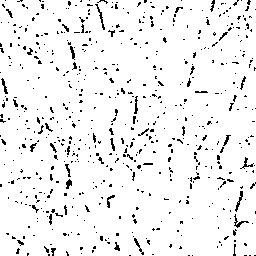

In [4]:
# Previewing an image
array_to_img(train_images[15])

In [5]:
train_images.shape

(1806, 256, 256, 3)

In [6]:
# Checking shape of data
print('train data shape:', np.shape(train_images), np.shape(train_labels))
print('test data shape:', np.shape(test_images), np.shape(test_labels))

train data shape: (1806, 256, 256, 3) (1806, 2)
test data shape: (0, 256, 256, 3) (0, 0)


In [7]:
# Unrowing/reshaping
train_img = train_images.reshape(train_images.shape[0], -1)
print('train_img:', np.shape(train_img))

# test_img = test_images.reshape(test_images.shape[0], -1)
# print('test_img:', np.shape(test_img))

train_img: (1806, 196608)


In [8]:
# Looking at the labels
train_labels

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [9]:
train_generator.class_indices

{'Dutch': 0, 'Flemish': 1}

In [11]:
# Transposing the labels
train_y = np.reshape(train_labels[:,0], (1806,1))
print('train labels final:', np.shape(train_y))

# test_y = np.reshape(test_labels[:,0], (463,1))
# print('test labels final:', np.shape(test_y))

train labels final: (1806, 1)


In [12]:
from keras import models
from keras import layers

In [ ]:
# np.random.seed(123)
# model = models.Sequential()
# model.add(layers.Dense(20, activation='relu', input_shape=(65536,))) #2 hidden layers
# model.add(layers.Dense(10, activation='relu'))
# model.add(layers.Dense(5, activation='relu'))
# model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
# model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

# histoire = model.fit(train_img,
#                     train_y,
#                     epochs=5,
#                     batch_size=100,
#                     validation_split=0.3)

In [17]:
np.random.seed(123)
model1 = models.Sequential()
model1.add(layers.Conv2D(filters=10, kernel_size=10, strides=2, activation='relu',
                        input_shape=(256, 256,  3)))
model1.add(layers.MaxPooling2D((10, 10)))

# model.add(layers.Conv2D(filters=10, kernel_size=5, strides=2,activation='relu'))
# model.add(layers.MaxPooling2D((4, 4)))

# model.add(layers.Conv2D(filters=10, kernel_size=1, strides=2,activation='relu'))
# model.add(layers.AveragePooling2D((1, 1)))

# model.add(layers.Conv2D(filters=10, kernel_size=1, strides=2,activation='relu'))
# model.add(layers.AveragePooling2D((1, 1)))

# model.add(layers.Conv2D(filters=10, kernel_size=1, strides=2,activation='relu'))
# model.add(layers.AveragePooling2D((1, 1)))


model1.add(layers.Flatten())
# model.add(layers.Dropout(0.2))
model1.add(layers.Dense(20, activation='relu'))
model1.add(layers.Dense(100, activation='relu'))
model1.add(layers.Dense(200, activation='relu'))
# model.add(layers.Dense(200, activation='relu'))
# model.add(layers.Dense(200, activation='relu'))
# model.add(layers.Dense(200, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))

In [18]:
from keras.optimizers import Adam
opt = Adam(lr=0.00001)
# from keras.optimizers import SGD
# opt = SGD(lr=0.00001)
from keras.callbacks import callbacks
stopping = callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=25)

model1.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_9 = model1.fit(train_images,
                    train_y,
                    epochs=500,
                    batch_size=16,
                    callbacks=[stopping],
                    validation_split=0.3)

Train on 1264 samples, validate on 542 samples
Epoch 1/500
1264/1264 [==============================] - 31s 24ms/step - loss: 3.8518 - accuracy: 0.5380 - val_loss: 3.2001 - val_accuracy: 0.5480
Epoch 2/500
1264/1264 [==============================] - 27s 22ms/step - loss: 2.9787 - accuracy: 0.5443 - val_loss: 2.7918 - val_accuracy: 0.5554
Epoch 3/500
1264/1264 [==============================] - 28s 22ms/step - loss: 2.4934 - accuracy: 0.5403 - val_loss: 2.4106 - val_accuracy: 0.5517
Epoch 4/500
1264/1264 [==============================] - 27s 22ms/step - loss: 2.1398 - accuracy: 0.5554 - val_loss: 2.1256 - val_accuracy: 0.5535
Epoch 5/500
1264/1264 [==============================] - 27s 21ms/step - loss: 1.8345 - accuracy: 0.5641 - val_loss: 1.9416 - val_accuracy: 0.5701
Epoch 6/500
1264/1264 [==============================] - 27s 22ms/step - loss: 1.5744 - accuracy: 0.5578 - val_loss: 1.6700 - val_accuracy: 0.5590
Epoch 7/500
1264/1264 [==============================] - 27s 21ms/step 

In [19]:
model1.save('../models/bw_model_1.h5')

In [22]:
from keras.models import load_model

bw_model_1 = load_model('../models/bw_model_1.h5')

bw_model_1.evaluate(x=train_images, y=train_y)

1806/1806 [==============================] - 23s 13ms/step


[0.5505943077875266, 0.7347729802131653]